In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Function to convert an audio file into a mel spectrogram and save it as an image
def convert_to_mel_spectrogram(file_path, img_size=(128, 128)):
    y, sr = librosa.load(file_path, sr=None)
    n_fft = min(2048, len(y))  # Adjust n_fft based on the length of the audio signal
    fmax = min(8000, sr / 2)  # Adjust fmax to be lower than the Nyquist frequency

    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=img_size[0], fmax=fmax, n_fft=n_fft)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    return mel_spec_db

# Function to preprocess the mel spectrogram (e.g., resizing, normalizing)
def preprocess_spectrogram(mel_spec_db, img_size=(128, 128)):
    mel_spec_db_resized = librosa.util.fix_length(mel_spec_db, size=img_size[1], axis=1)
    mel_spec_db_resized = np.expand_dims(mel_spec_db_resized, axis=-1)  # Add channel dimension
    return mel_spec_db_resized

# Prediction function for two audio files
def predict_same_word(siamese_model, audio_path_1, audio_path_2, img_size=(128, 128)):
    # Convert both audio files to mel spectrograms
    mel_spec_1 = convert_to_mel_spectrogram(audio_path_1, img_size)
    mel_spec_2 = convert_to_mel_spectrogram(audio_path_2, img_size)
    
    # Preprocess the mel spectrograms
    mel_spec_1 = preprocess_spectrogram(mel_spec_1, img_size)
    mel_spec_2 = preprocess_spectrogram(mel_spec_2, img_size)
    
    # Expand dimensions to match the input shape of the model
    mel_spec_1 = np.expand_dims(mel_spec_1, axis=0)
    mel_spec_2 = np.expand_dims(mel_spec_2, axis=0)

    # Get the prediction from the Siamese model
    prediction = siamese_model.predict([mel_spec_1, mel_spec_2])

    # Display the mel spectrograms
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    librosa.display.specshow(mel_spec_1[0, :, :, 0], sr=None, x_axis='time', y_axis='mel', cmap='viridis')
    plt.title(f'Audio 1: {os.path.basename(audio_path_1)}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    librosa.display.specshow(mel_spec_2[0, :, :, 0], sr=None, x_axis='time', y_axis='mel', cmap='viridis')
    plt.title(f'Audio 2: {os.path.basename(audio_path_2)}')
    plt.axis('off')

    plt.show()

    # Determine whether the words are the same based on the model's prediction
    return 'Same Words' if prediction < 0.5 else 'Different Words'

# Example Usage
audio_path_1 = 'path_to_first_audio_file.wav'
audio_path_2 = 'path_to_second_audio_file.wav'

# Load the trained Siamese model
siamese_model = load_model('path_to_trained_siamese_model.h5')

result = predict_same_word(siamese_model, audio_path_1, audio_path_2)
print(f'Prediction: {result}')


In [18]:
import IPython.display as ipd
import librosa
import tensorflow as tf
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt

model = models.load_model('best_model.keras')

img_size = 128, 128

path_A = '/Users/adityachavan/Desktop/SIH_2024/speech_commands_v0.02/up/0a2b400e_nohash_0.wav'
path_B = '/Users/adityachavan/Desktop/SIH_2024/speech_commands_v0.02/up/2fcb6397_nohash_3.wav'

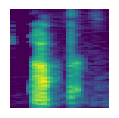

In [19]:
y, sr = librosa.load(path_A, sr=None)
n_fft = min(2048, len(y))  # Adjust n_fft based on the length of the audio signal

# Dynamically adjust fmax to be lower than half of the sampling rate (Nyquist frequency)
fmax = min(8000, sr / 2)

mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=img_size[0], fmax=fmax, n_fft=n_fft)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot and save the mel spectrogram
plt.figure(figsize=(img_size[0]/100, img_size[1]/100))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
plt.axis('off')

save_path = 'test_A.png'
plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
# plt.close()
ipd.Audio(y, rate=sr)

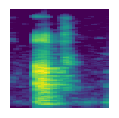

In [20]:
y, sr = librosa.load(path_B, sr=None)
n_fft = min(2048, len(y))  # Adjust n_fft based on the length of the audio signal

# Dynamically adjust fmax to be lower than half of the sampling rate (Nyquist frequency)
fmax = min(8000, sr / 2)

mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=img_size[0], fmax=fmax, n_fft=n_fft)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot and save the mel spectrogram
plt.figure(figsize=(img_size[0]/100, img_size[1]/100))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
plt.axis('off')

save_path = 'test_B.png'
plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
# plt.close()
ipd.Audio(y, rate=sr)

In [21]:
import cv2
img_A = cv2.imread('test_A.png')
img_B = cv2.imread('test_b.png')

img_A.resize(1, 128, 128, 3)
img_B.resize(1, 128, 128, 3)

In [22]:
model.predict([img_A,
               img_B]).flatten()[0] > 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


False